# Project 3 - Part 1, Git Practice, APS1070 Fall 2024

**Deadline: Nov 8th, 23:00**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself without proper acknowledgment of the source, including generated code (please refer to the course syllabus). Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Name: Enxi Jiang
Student ID: 1006531683

## Part 1: Getting started with GitHub [1.5 Marks + 1.5 Mark Git Submission]

For the first part of this project, we will work on a [global economy indicators dataset](https://www.kaggle.com/datasets/prasad22/global-economy-indicators) that reports the Gross Domestic Product (GDP) from 1970 onwards for more than 200 countries and areas of the world.

1. Write a function to do the following: **[0.5]**
    * Takes the dataframe, and your list of counries as inputs (Afghanistan, Albania, Algeria, ...)
    * Plots time-series for the input list (it is best to plot each country in a separate graph (subplot), so you can easily compare them.)
    
2. Apply `StandardScalar` to the data. Each year should have a `mean` of zero and a `StD` of 1. **[0.25]**
3. Run the function in `step 1` on both the original as well as the standardized dataset for the ` Albania `,` Greece `,` Somalia `,` Sweden `,` Oman `, and ` Italy `.   **[0.25]**
4. Discuss the trends in the standardized time-series for ` Albania `,` Greece `,` Somalia `,` Sweden `,` Oman `, and ` Italy `. What does it mean if the curve goes up or down? What does the sign of values indicate? **[0.5]**

In [94]:
import pandas as pd
data_raw = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/Sabaae/Dataset/main/domestic_product.csv',
    index_col=0
)

In [98]:
data_raw

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1.731436e+09,1.812838e+09,1.647900e+09,1.702716e+09,2.061729e+09,2.319754e+09,2.513581e+09,2.864939e+09,3.222964e+09,3.630768e+09,...,1.913650e+10,1.962180e+10,1.955070e+10,1.871305e+10,1.801956e+10,1.889635e+10,1.841885e+10,1.890449e+10,2.014344e+10,1.493901e+10
Albania,2.265577e+09,2.330585e+09,2.397526e+09,2.466543e+09,2.537016e+09,2.610110e+09,2.685746e+09,2.760746e+09,2.842276e+09,2.372306e+09,...,1.231978e+10,1.277628e+10,1.322824e+10,1.138692e+10,1.186136e+10,1.301973e+10,1.515644e+10,1.540183e+10,1.513187e+10,1.826004e+10
Algeria,5.155121e+09,5.363676e+09,7.176428e+09,9.229622e+09,1.325976e+10,1.555555e+10,1.775003e+10,2.099094e+10,2.637376e+10,3.320143e+10,...,2.090000e+11,2.100000e+11,2.140000e+11,1.660000e+11,1.600000e+11,1.700000e+11,1.750000e+11,1.720000e+11,1.460000e+11,1.630000e+11
Andorra,9.947679e+07,1.131285e+08,1.435060e+08,1.908638e+08,2.360555e+08,2.785143e+08,2.875884e+08,3.213901e+08,3.897459e+08,5.207423e+08,...,3.188830e+09,3.192603e+09,3.267334e+09,2.788758e+09,2.894646e+09,3.000160e+09,3.218419e+09,3.155152e+09,2.890998e+09,3.324648e+09
Angola,3.806982e+09,4.007445e+09,4.102155e+09,5.016276e+09,5.626961e+09,4.147433e+09,3.980907e+09,4.344225e+09,4.845482e+09,5.380155e+09,...,1.280000e+11,1.370000e+11,1.460000e+11,1.160000e+11,1.010000e+11,1.220000e+11,1.010000e+11,8.313674e+10,5.482108e+10,7.053324e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vanuatu,3.800994e+07,4.106648e+07,5.456834e+07,6.656775e+07,6.638025e+07,8.030427e+07,7.756354e+07,8.125372e+07,9.915994e+07,1.304919e+08,...,7.817029e+08,8.017876e+08,8.149505e+08,7.596893e+08,8.043282e+08,8.800470e+08,9.147011e+08,9.404540e+08,9.094210e+08,9.805715e+08
Venezuela (Bolivarian Republic of),1.386364e+10,1.522727e+10,1.674419e+10,2.000000e+10,3.046512e+10,3.209302e+10,3.674419e+10,4.232558e+10,4.604651e+10,5.651163e+10,...,3.810000e+11,3.710000e+11,3.640000e+11,3.440000e+11,2.890000e+11,2.480000e+11,2.040000e+11,1.500000e+11,1.060000e+11,1.120000e+11
Viet Nam,2.775103e+09,3.023992e+09,3.236929e+09,3.350312e+09,3.604731e+09,3.896483e+09,4.540827e+09,5.413318e+09,6.531933e+09,7.140326e+09,...,1.960000e+11,2.140000e+11,2.330000e+11,2.390000e+11,2.570000e+11,2.810000e+11,3.100000e+11,3.340000e+11,3.470000e+11,3.660000e+11


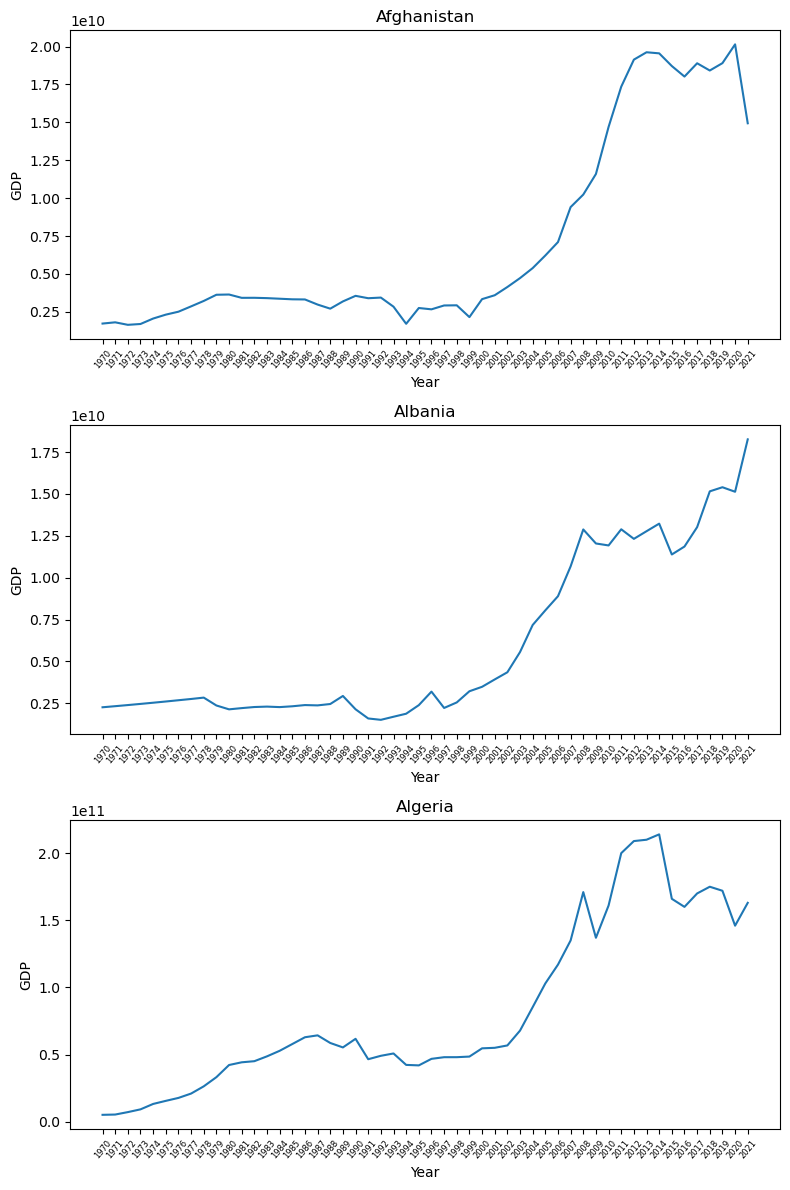

In [102]:
### YOUR CODE HERE ###
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

data_raw.index = data_raw.index.str.strip()

def plot_timeseries(df, country_list):
    fig, axs = plt.subplots(len(country_list), figsize=(8, 4*len(country_list)))
    for i, country in enumerate(country_list):
        axs[i].plot(df.loc[country])
        axs[i].set_title(f"GDP Time-Series for {country}")
        axs[i].set_xlabel("Year")
        axs[i].set_ylabel("GDP")
        axs[i].set_title(country)
        axs[i].tick_params(axis='x', labelsize=6, rotation=50)

    fig.tight_layout()
    plt.show()

plot_timeseries(data_raw, ['Afghanistan', 'Albania', 'Algeria'])

In [106]:
df_scaled = pd.DataFrame(StandardScaler().fit_transform(data_raw), 
                         columns=data_raw.columns, 
                         index=data_raw.index)

df_scaled

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,-0.174041,-0.178047,-0.188098,-0.202552,-0.212808,-0.217360,-0.214631,-0.215601,-0.220261,-0.227601,...,-0.251906,-0.250614,-0.246430,-0.230431,-0.229401,-0.230641,-0.230065,-0.225233,-0.219273,-0.222299
Albania,-0.167722,-0.172426,-0.180831,-0.196099,-0.209125,-0.215302,-0.213526,-0.216197,-0.222121,-0.233071,...,-0.256419,-0.255009,-0.250296,-0.234823,-0.233002,-0.233898,-0.231754,-0.226985,-0.221790,-0.220827
Algeria,-0.133536,-0.139499,-0.134501,-0.138959,-0.126029,-0.123561,-0.116798,-0.111998,-0.107114,-0.099060,...,-0.126220,-0.128376,-0.127551,-0.142130,-0.146369,-0.146892,-0.149020,-0.148666,-0.156077,-0.156669
Andorra,-0.193349,-0.196499,-0.202683,-0.215325,-0.226956,-0.231825,-0.228924,-0.230140,-0.234108,-0.241120,...,-0.262463,-0.261163,-0.256386,-0.239977,-0.238246,-0.239452,-0.237933,-0.233110,-0.227936,-0.227447
Angola,-0.149486,-0.154222,-0.164305,-0.174557,-0.185179,-0.204407,-0.205210,-0.207146,-0.212331,-0.219997,...,-0.179841,-0.175248,-0.169124,-0.172106,-0.180873,-0.173496,-0.187322,-0.193109,-0.201861,-0.197656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vanuatu,-0.194076,-0.197281,-0.203545,-0.216376,-0.228271,-0.233230,-0.230273,-0.231512,-0.235528,-0.242816,...,-0.264057,-0.262698,-0.257885,-0.241194,-0.239468,-0.240627,-0.239125,-0.234218,-0.228931,-0.228486
Venezuela (Bolivarian Republic of),-0.030506,-0.032419,-0.041746,-0.047964,0.007302,-0.006364,0.005163,0.009945,-0.010965,0.002268,...,-0.012360,-0.025001,-0.035847,-0.035417,-0.070928,-0.103660,-0.134010,-0.159669,-0.176162,-0.179276
Viet Nam,-0.161694,-0.164898,-0.172693,-0.188632,-0.200850,-0.206186,-0.201614,-0.201036,-0.204089,-0.212345,...,-0.134826,-0.125807,-0.115936,-0.098366,-0.089642,-0.085370,-0.079145,-0.067645,-0.055148,-0.066686


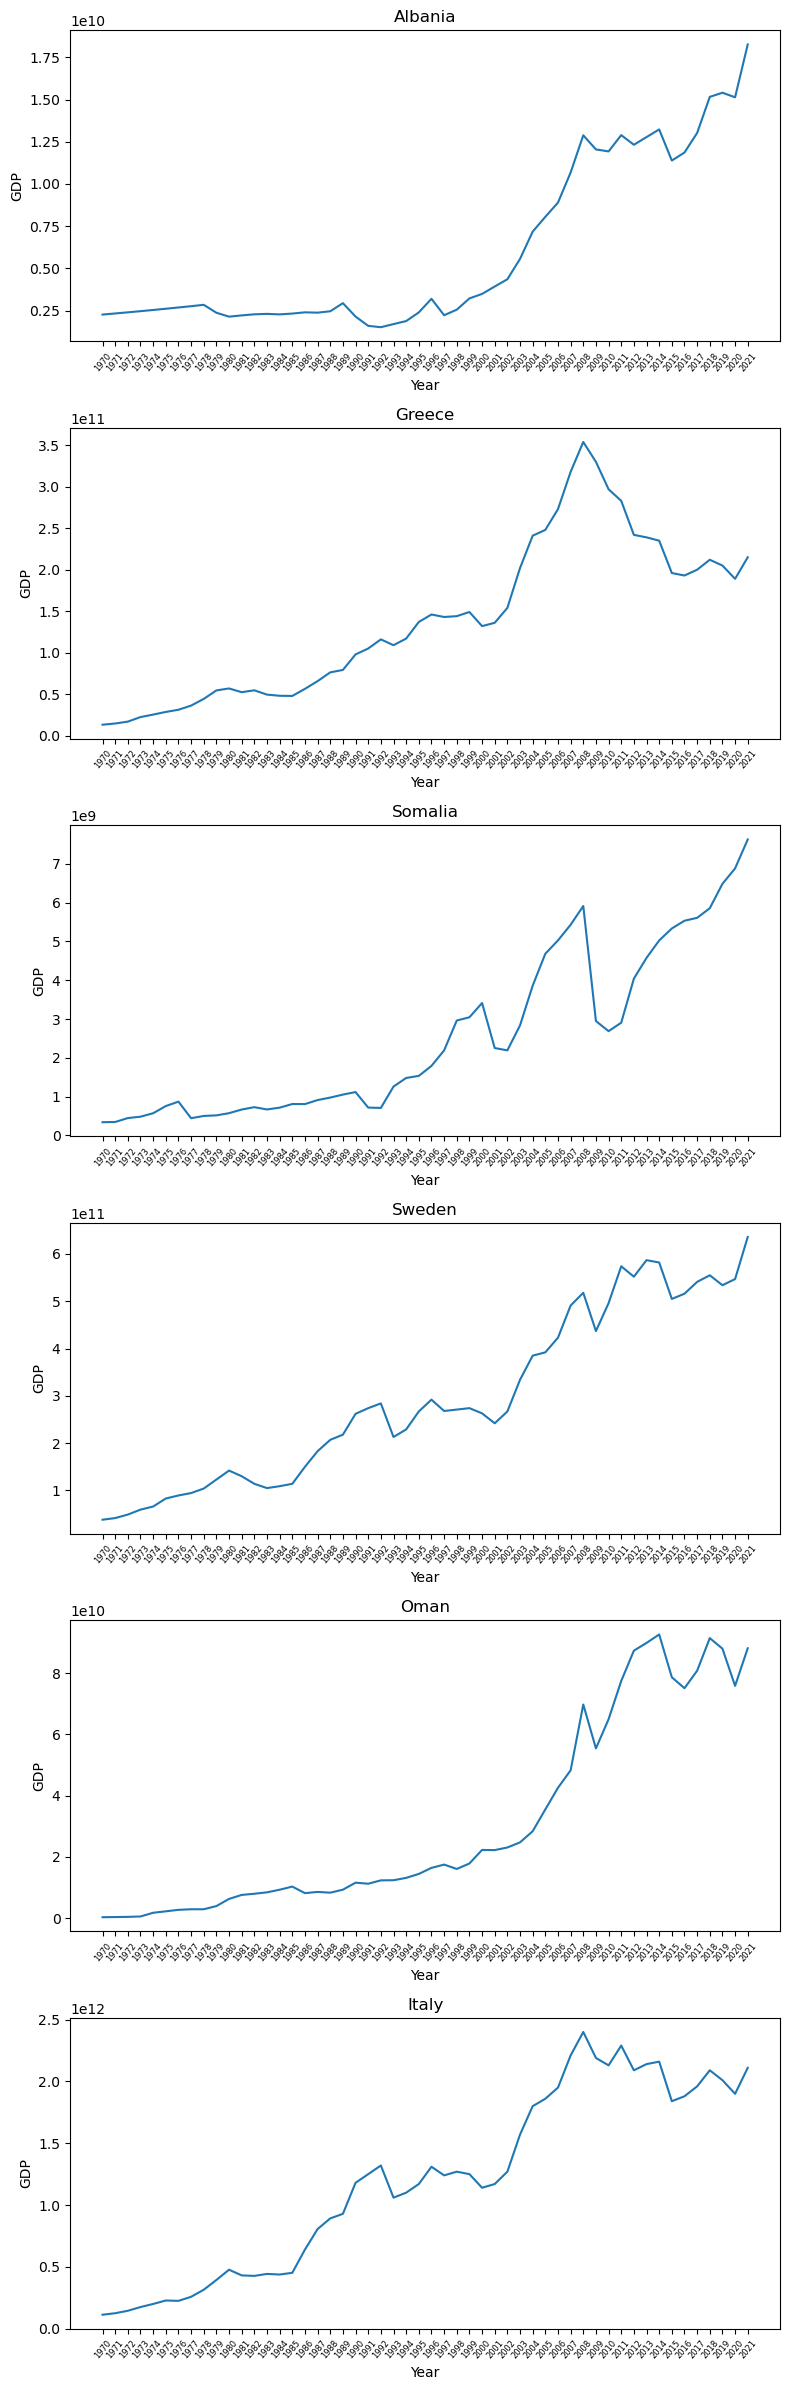

In [110]:
country_list= ['Albania', 'Greece', 'Somalia', 'Sweden', 'Oman', 'Italy']
plot_time_series(data_raw, country_list)

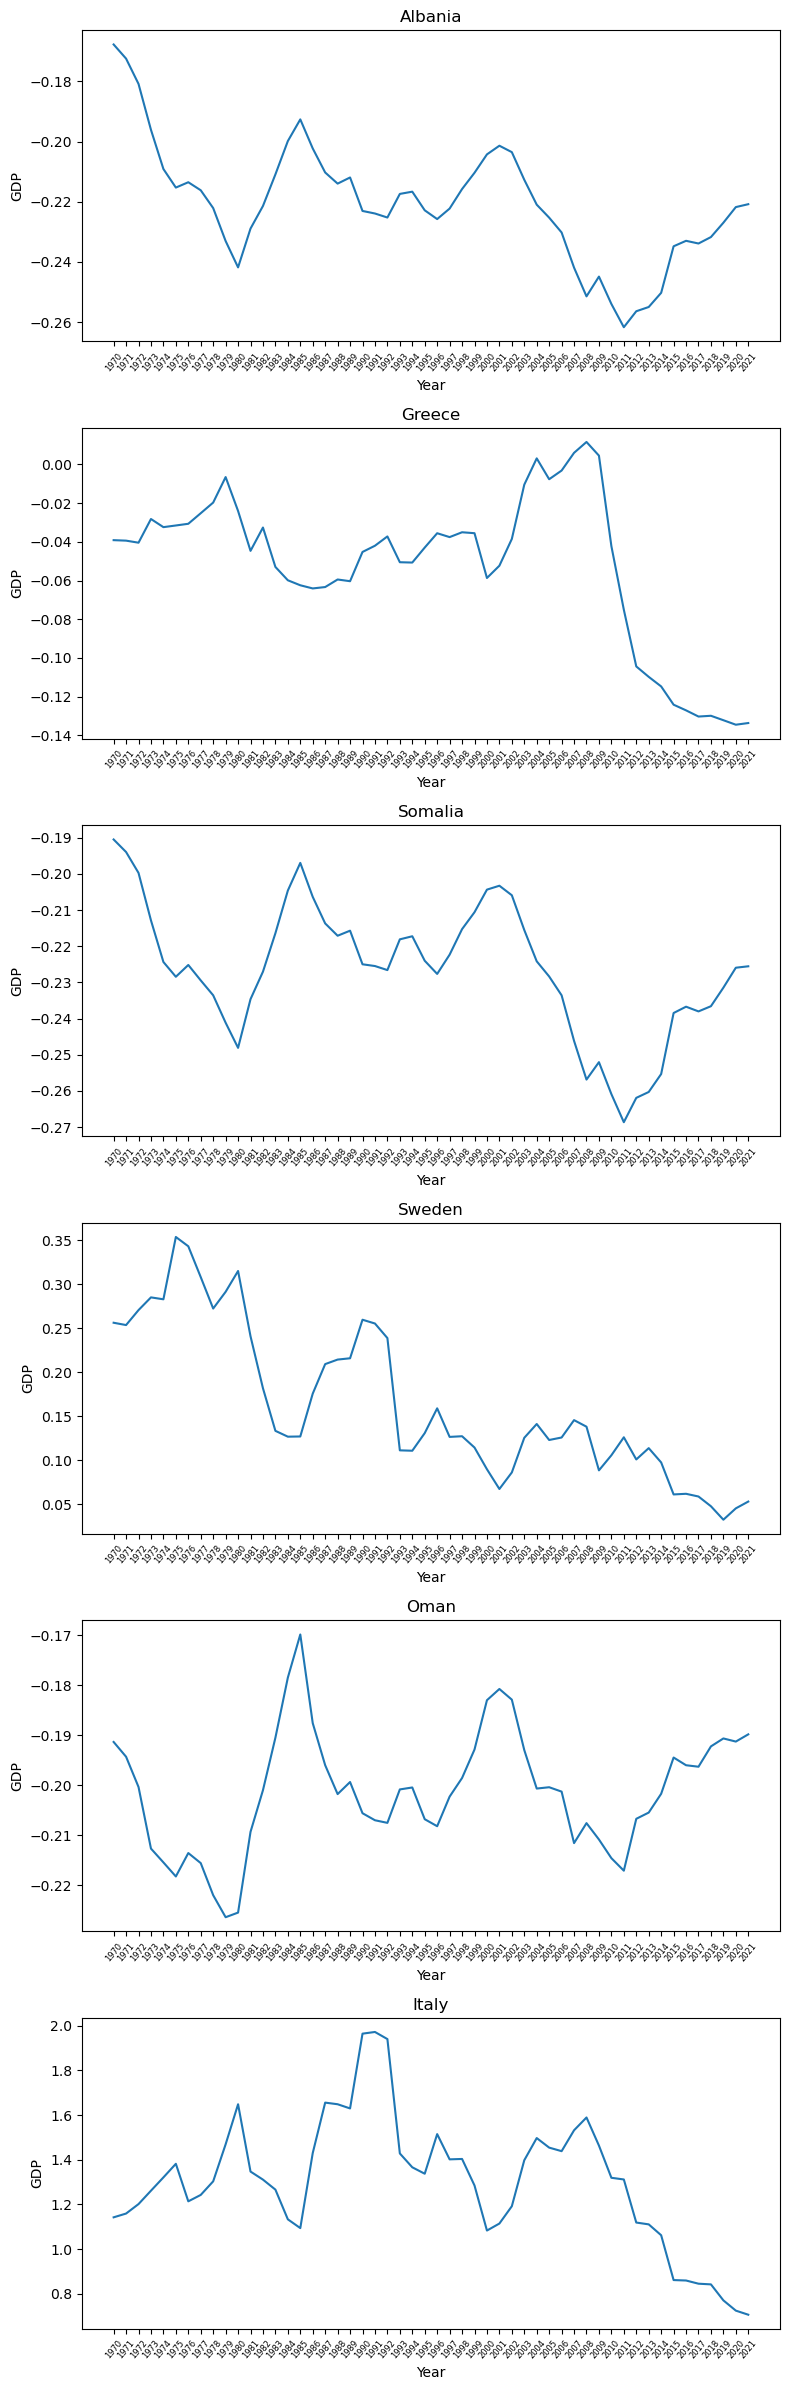

In [114]:
plot_time_series(df_scaled, country_list)

In a standardized time series plot, each country's GDP is measured as the standard deviation of the global average GDP for each year.
As we can see, the GDP of Albania and Greece is generally lower than the global average, especially in Greece, which has declined significantly since 2008.Somalia's GDP is generally below average, but GDP fluctuates widely and has rebounded a little since 2011. Sweden's GDP is generally above average, but on a downward trend. Oman's GDP is highly volatile. Italy's GDP has fallen significantly since 2008.

Curve goes up means that the country's GDP growth is above the global average, and curve goes down means that it is below the global average.
A positive value means that GDP is above the global average, while a negative value means that it is below the mean.